The Sparks Foundation- GRIP- Data Science and Business Analytics

*Author: Harsh

April 2023

Task 1 : Prediction using supervised machine learning

**_Predict the percentage of a student based on the number of study hours_**

Importing the required libraries for Data analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
student_df =pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [6]:
type(student_df)

pandas.core.frame.DataFrame

In [7]:
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
student_df.isnull().sum()                        #checking the presence of null values

Hours     0
Scores    0
dtype: int64

In [10]:
student_df.corr()                              # correlation between number of hours studied and percentage scores

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
student_df.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
student_df.shape

(25, 2)

**SCATTER PLOT**

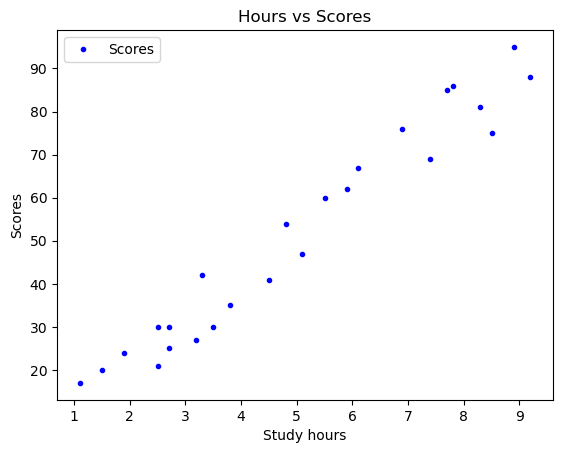

In [14]:
student_df.plot(x='Hours', y='Scores', style='.', color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.show()

**HISTOGRAM**

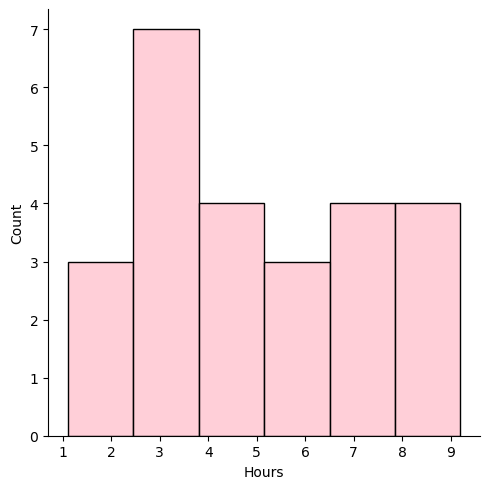

In [15]:
sns.displot(student_df['Hours'],label='hour',color='Pink')

In [34]:
x = student_df.iloc[:, :-1].values
y = student_df.iloc[:, 1].values
y.shape, x.shape

((25,), (25, 1))

**EVALUATING THE MODEL USING THE TRAIN TEST SPLIT**

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

**The class sklearn_model.LinearRegression will be used to perform linear and polynomial regression and make predictions accordingly.**

In [40]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete.")

Training complete.


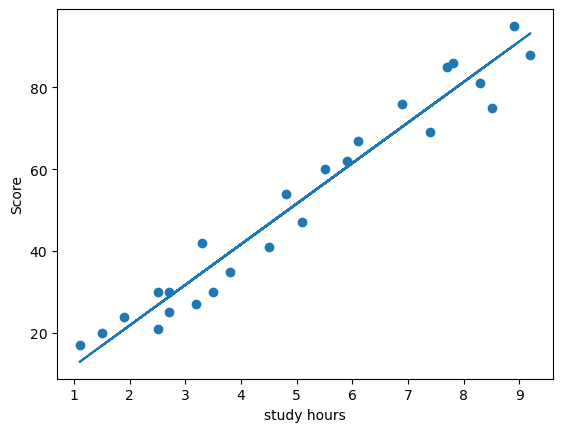

In [42]:
line = regressor.coef_*x+ regressor.intercept_
plt.scatter(x, y)
plt.plot(x,line)
plt.xlabel('study hours')
plt.ylabel('Score')
plt.show()

**MAKING PREDICTIONS**
Now that we have trained our algorithm, its time to make some predictions.

In [43]:
print(x_test)                   #Testing data in hours
y_pred  = regressor.predict(x_test)          #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**COMPARING ACTUAL VS PREDICTED**

In [44]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**EVALUATING THE MODEL**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics 

In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


**Predicting the score for 9.25 hours**

In [49]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Number of hours = {}".format(hours))
print(" Prediction Score ={}".format(own_pred[0]))

Number of hours = [[9.25]]
 Prediction Score =93.69173248737538
